# 对SLE_GSE255441进行手动注释

此为初级细胞类型

参考了健康小鼠肾脏各细胞类型的marker, 这些marker源于`marker_healyth_mouse_kidney`

最终输出为`obs_Seurat.csv`

更新日期2024年4月19日

In [1]:
library(cowplot)
source(file.path('~/link/res_publish','func_r_map_seurat.r'))
item = 'SLE_GSE255441'
p_root_item = file.path('.')
p_plot_item = file.path(p_root_item,'fig')
if(!dir.exists(p_plot_item)){
    dir.create(p_plot_item,recursive = TRUE)
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching packag


> function----------------------------------------
serurat_to_mtx

> Map_Seurat function-----------------------------
Map_Seurat_normalize
Map_Seurat_cluster
Map_Seurat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap


# Seurat 标准流程

In [2]:
if(file.exists(file.path(p_root_item,'SLE_GSE255441.rds'))){
    cat(sprintf('[read]\n'))
    adata = readRDS(file.path(p_root_item,'SLE_GSE255441.rds'))
    markers = read_csv('markers.csv')
    markers = markers %>% select(gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj) %>%
    filter(p_val_adj < 0.05 ,avg_log2FC > 1,pct.1 > 0.5) %>% 
    arrange(cluster,desc(avg_log2FC)) %>% mutate(
        cluster = as.character(cluster)
    )
    markers %>% head(2)
}else{
    # 质控
    adata = load_seuratobj(file.path(p_cache,'disease','SLE_mouse_LN_kidney'))
    adata[["percent.mt"]] = PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
    options(repr.plot.width = 3*6,repr.plot.height = 1*6)
    VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
    
    adata <- subset(adata, subset = nFeature_RNA > 200 & nFeature_RNA < 4000 & percent.mt < 5)
    options(repr.plot.width = 3*6,repr.plot.height = 1*6)
    VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
    # 标准流程
    adata@meta.data %>% head(2)
    options(repr.plot.width = 1*6,repr.plot.height = 1*6)
    adata = Map_Seurat_normalize(adata)
    # function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
    options(repr.plot.width = 1*6,repr.plot.height = 1*6)
    adata = Map_Seurat_cluster_run_harmony(
        adata,dims=1:20,resolution = 0.1,
        key_batch = 'X_batch')
    # marker
    adata@meta.data %>% head(2)
    markers = FindAllMarkers(adata)
    markers %>% write_csv('markers.csv')
    saveRDS(adata,file.path(p_root_item,'SLE_GSE255441.rds'))
}

[read]


Rows: 90051 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Cyp2a5,0,4.424365,0.563,0.047,0
Dpys,0,4.420886,0.508,0.022,0


[out][plot] SLE_GSE255441_harmony.png
	in ./fig


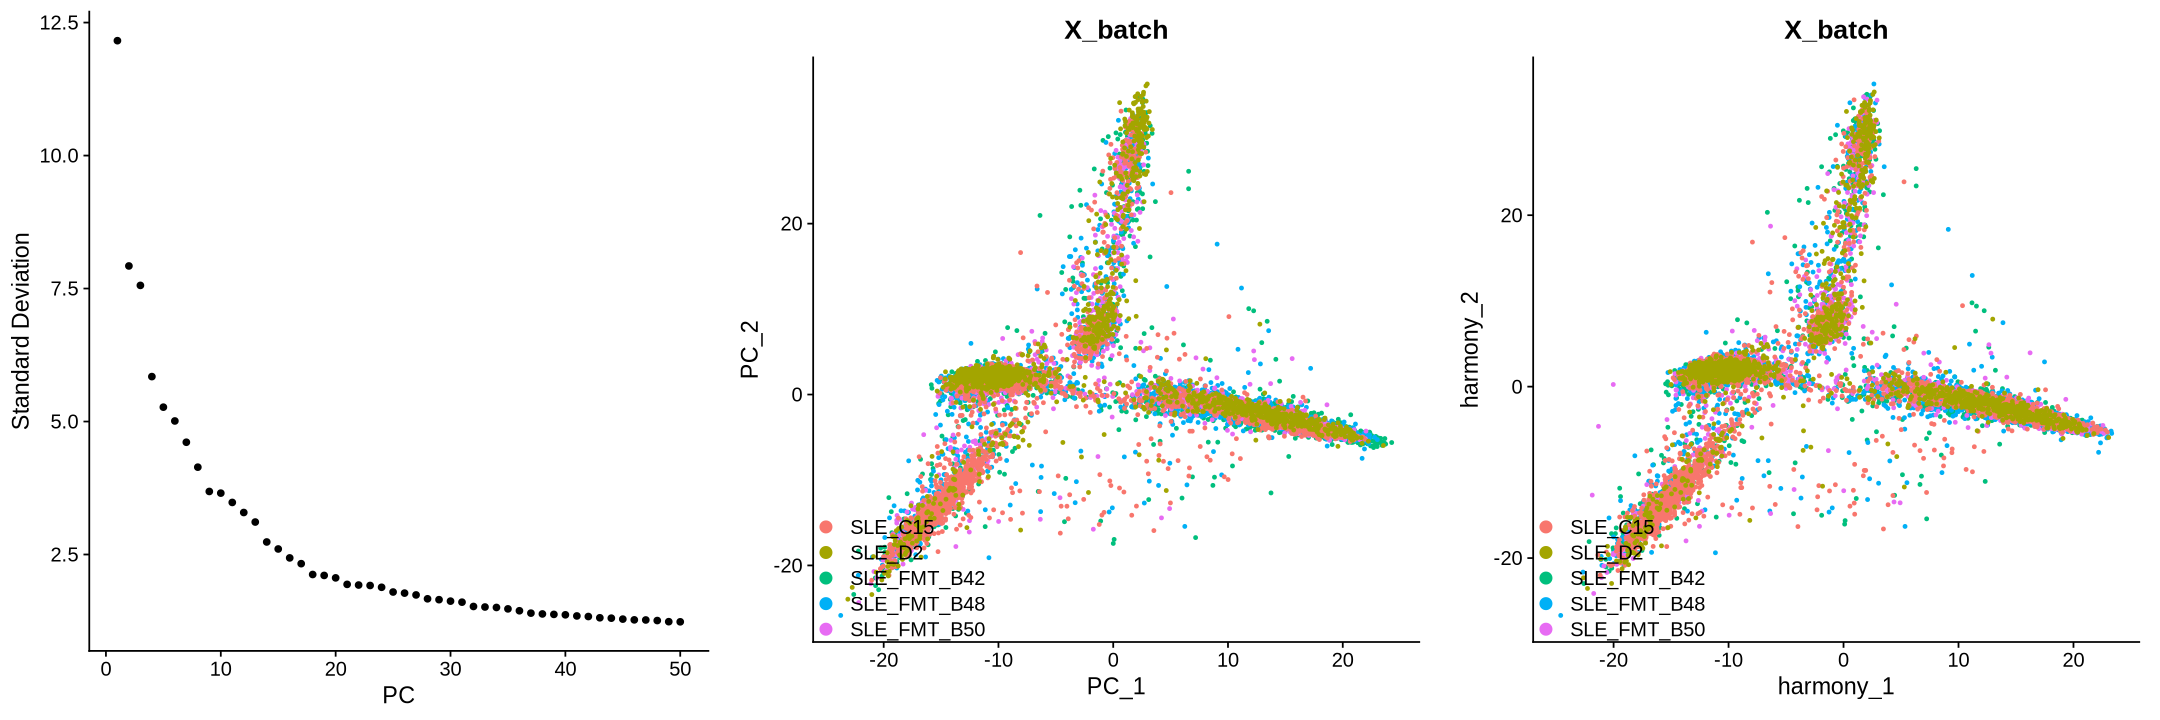

In [3]:
options(repr.plot.width = 6 * 3,repr.plot.height = 6)
p1 = ElbowPlot(adata,ndims = 50)
p2 =  DimPlot(object = adata, reduction = "pca",, group.by = 'X_batch',
        pt.size =1e4/nrow(adata@meta.data)) + them_legend
p3 = DimPlot(object = adata, reduction = "harmony",, group.by = 'X_batch',
        pt.size =1e4/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,p3,nrow=1,ncol=3)
p
savefig(p,sprintf('%s_harmony.png',item),p_plot_item,width_ratio = 4*3)

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,treatment,sample,percent.mt,RNA_snn_res.0.1,seurat_clusters,cell_type
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
AAACCCAGTAGACAGC-1;B42,AAACCCAGTAGACAGC-1;B42,SeuratProject,8045,2201,SLE_FMT_B42,SLE_FMT,B42,0.07458048,0,0,NA
AAACCCATCAGATTGC-1;B42,AAACCCATCAGATTGC-1;B42,SeuratProject,9365,2839,SLE_FMT_B42,SLE_FMT,B42,2.29578217,2,2,NA


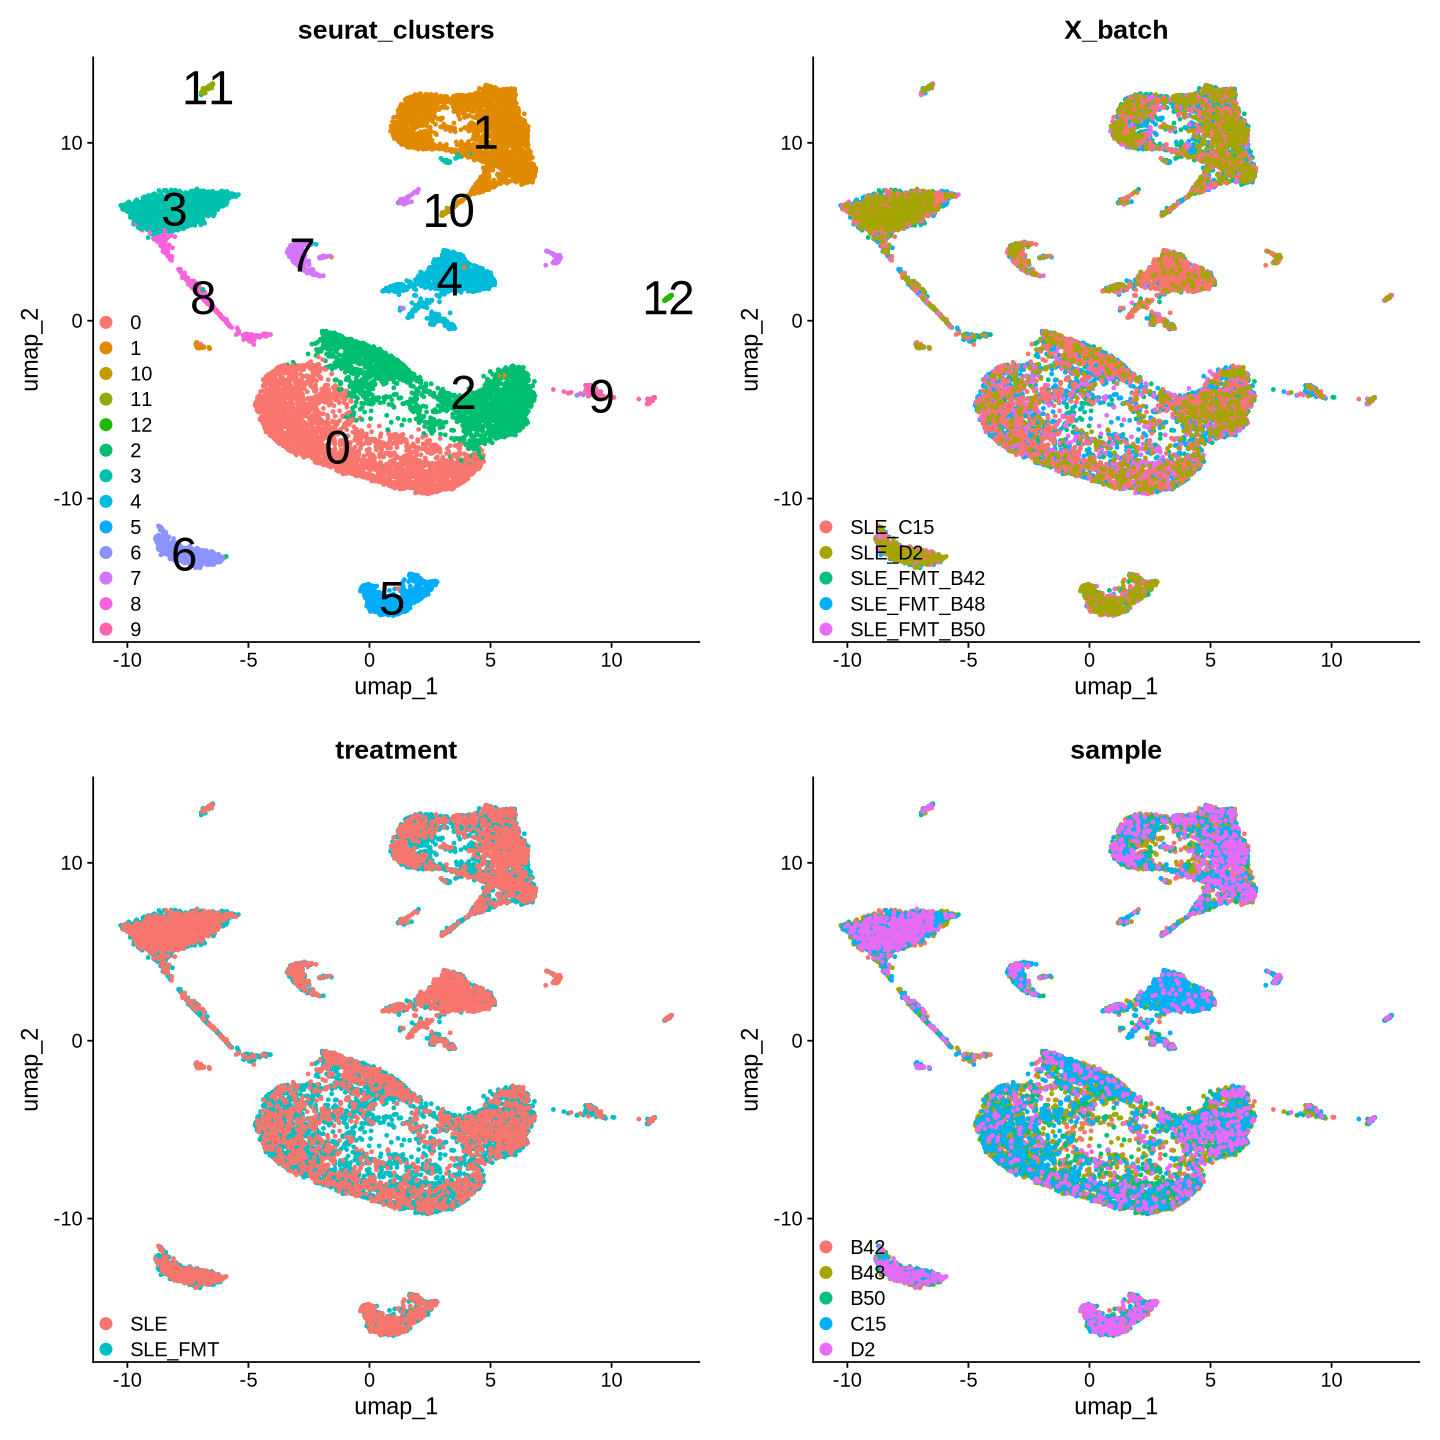

In [4]:
# adata <- adata  %>% FindClusters(resolution = 0.2, verbose = FALSE)
options(repr.plot.width = 2*6,repr.plot.height = 2*6)
adata@meta.data %>% head(2)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size =1e4/nrow(adata@meta.data)) + them_legend
p2 = UMAPPlot(adata,group.by='X_batch',pt.size =1e4/nrow(adata@meta.data)) + them_legend
p3 = UMAPPlot(adata,group.by='treatment',pt.size =1e4/nrow(adata@meta.data)) + them_legend
p4 = UMAPPlot(adata,group.by='sample',pt.size =1e4/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,p3,p4,nrow=2,ncol=2)
p
# savefig(p,sprintf('%s_umap_cluster.png',item),p_plot_item,
#         width_ratio = 2*4,height_ratio = 2*4)

# query cluster

In [5]:
# markers_healthy = read_csv('marker_mouse_healthy_kidney.csv')
markers_healthy = read_csv(
    file.path(p_cache,'healthy/m_kidneys_GSE107585','markers_pre_cell_type.csv'))
markers_healthy = markers_healthy %>% select(gene,group,avg_log2FC,pct.1,pct.2,p_val_adj) %>%
filter(p_val_adj < 0.01 ,avg_log2FC > 1,pct.1 > 0.5) %>% 
arrange(group,desc(avg_log2FC)) %>% mutate(
    group = as.character(group)
)
markers_healthy %>% head(2)
paste(unique(markers_healthy$group),collapse = ',')

Rows: 155454 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): group, gene
dbl (5): p_val, avg_log2FC, pct.1, pct.2, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,group,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Retnlg,B lymph,15.57509,0.757,0.001,0
S100a8,B lymph,14.33479,0.865,0.005,0


[1] "B lymph,CD-IC,CD-PC,CD-Trans,DCT,Fib,LOH,Marco,NK,Neutro,Novel1,Novel2,PT,Podo,T lymph"

> markers_healthy 怎么这么邪门,我还是信CellMarker吧

根据markers_healthy确定的细胞类型，在细胞类型的前方加上`_`

首先关注免疫细胞，肾实质细胞先根据markers_healthy进行标注吧

在输出时去除

[1] "B lymph,CD-IC,CD-PC,CD-Trans,DCT,Fib,LOH,Marco,NK,Neutro,Novel1,Novel2,PT,Podo,T lymph"

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,treatment,sample,percent.mt,RNA_snn_res.0.1,seurat_clusters,cell_type
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
AAACCCAGTAGACAGC-1;B42,AAACCCAGTAGACAGC-1;B42,SeuratProject,8045,2201,SLE_FMT_B42,SLE_FMT,B42,0.07458048,0,0,LOH
AAACCCATCAGATTGC-1;B42,AAACCCATCAGATTGC-1;B42,SeuratProject,9365,2839,SLE_FMT_B42,SLE_FMT,B42,2.29578217,2,2,LOH


[out][plot] SLE_GSE255441_umap_cluster.png
	in ./fig


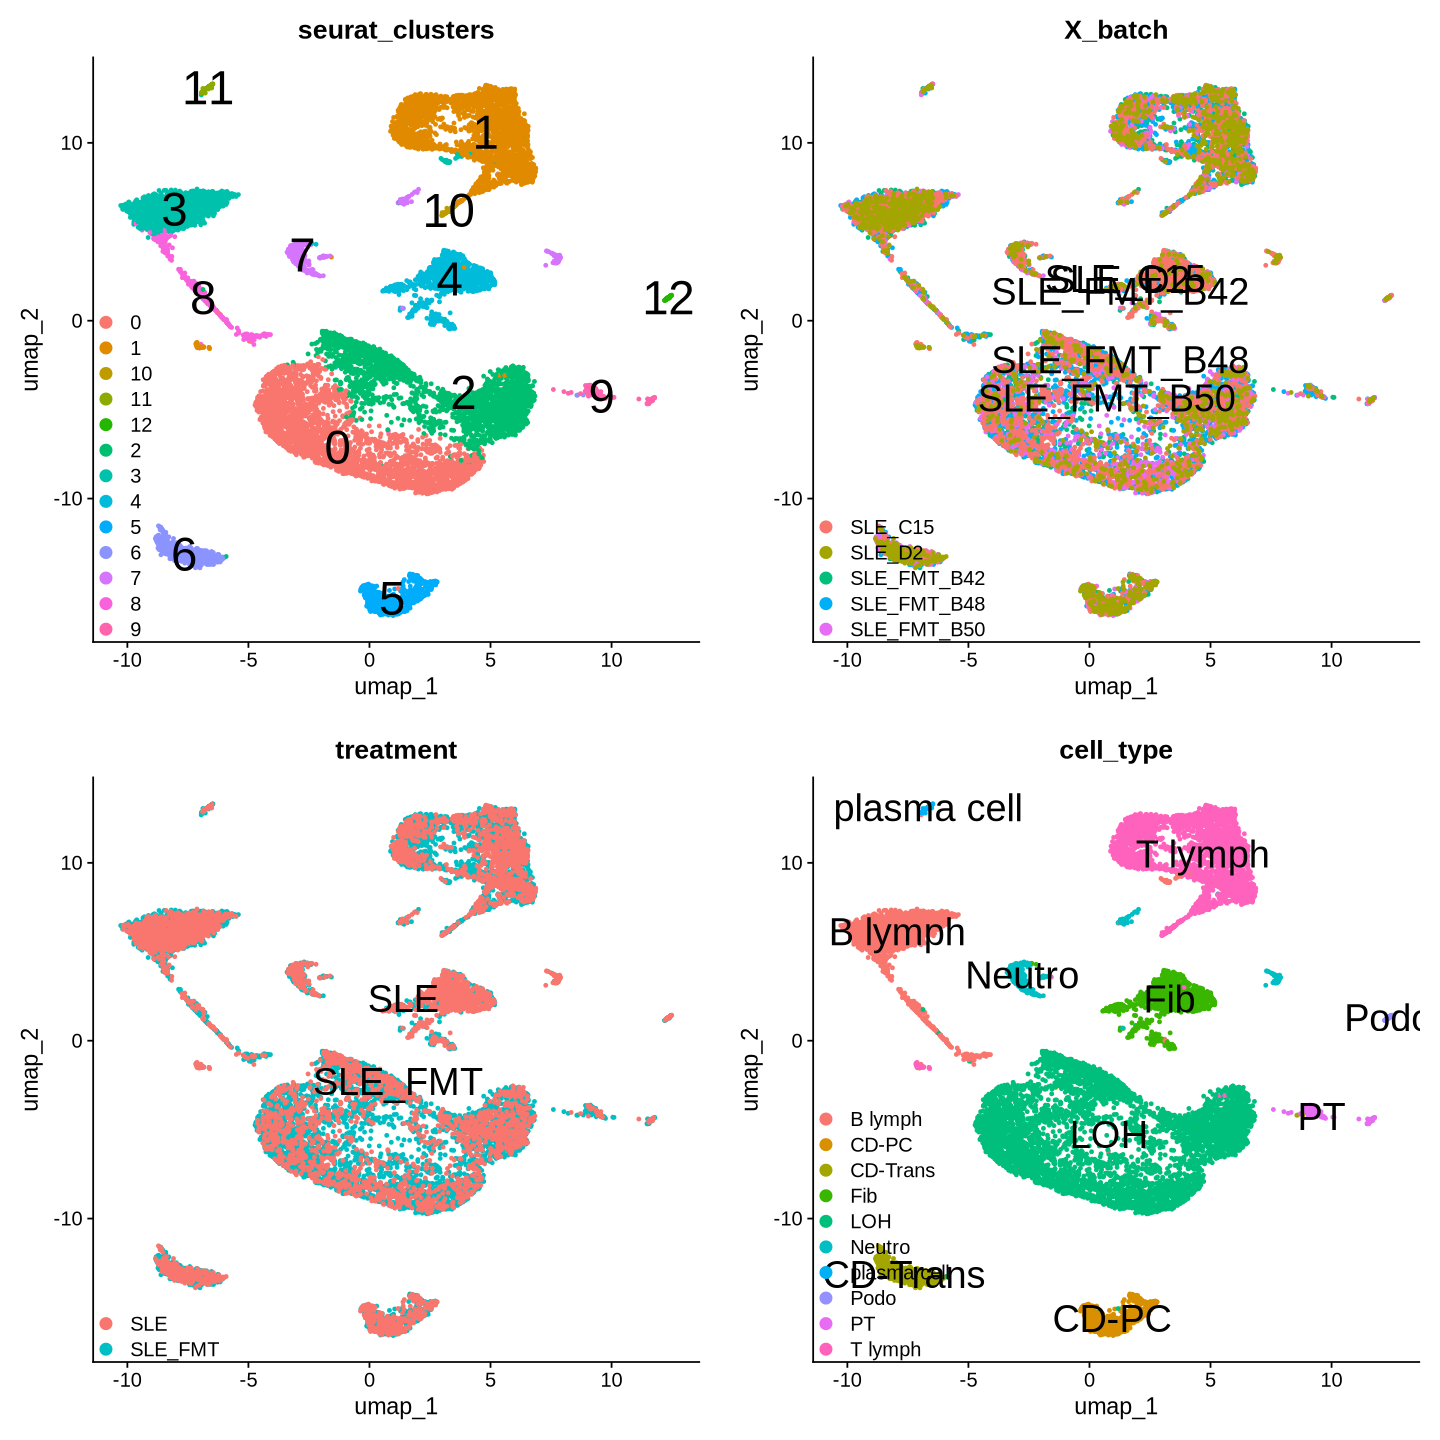

In [6]:
paste(unique(markers_healthy$group), collapse = ',')
tbl_cell_type <- tribble(
  ~seurat_clusters, ~cell_type,
  '0', '_LOH',
  '1', 'T lymph',
  '2', '_LOH',
  '3', 'B lymph',
  '4', 'Fib',
  '5', '_CD-PC',
  '6', '_CD-Trans',
  '7', 'Neutro',
  '8', 'B lymph',
  '9', '_PT',
  '10', 'T lymph',
  '11', 'plasma cell',
  '12', '_Podo',
)
tbl_cell_type = tbl_cell_type %>% mutate(
    cell_type = str_replace(cell_type,'^_','')
)
adata@meta.data <- adata@meta.data %>%
  select(
    cell_name, orig.ident, nCount_RNA, nFeature_RNA,
    X_batch, treatment, sample, percent.mt,
    RNA_snn_res.0.1, seurat_clusters) %>%
  mutate(
    seurat_clusters = as.character(seurat_clusters))  %>%
  left_join(tbl_cell_type, by = c('seurat_clusters' = 'seurat_clusters'))

rownames(adata@meta.data) <- adata@meta.data$cell_name
options(repr.plot.width = 2 * 6, repr.plot.height = 2 * 6)
adata@meta.data %>% head(2)
p1 <- UMAPPlot(adata, group.by = 'seurat_clusters', label = TRUE, label.size = 10,
  pt.size = 1e4 / nrow(adata@meta.data)) + them_legend
p2 <- UMAPPlot(adata, group.by = 'X_batch', label = TRUE, label.size = 8,
  pt.size = 1e4 / nrow(adata@meta.data)) + them_legend
p3 <- UMAPPlot(adata, group.by = 'treatment', label = TRUE, label.size = 8,
  pt.size = 1e4 / nrow(adata@meta.data)) + them_legend
p4 <- UMAPPlot(adata, group.by = 'cell_type', label = TRUE, label.size = 8,
  pt.size = 1e4 / nrow(adata@meta.data)) + them_legend
p <- cowplot::plot_grid(p1, p2,p3,p4, nrow = 2, ncol = 2)
p
savefig(p,sprintf('%s_umap_cluster.png',item), p_plot_item,
  width_ratio = 2 * 6, height_ratio = 2 * 6)

In [7]:
# markers %>% filter(gene %in% c('Cd3e','Cd3d','Cd4','Cd8a','Cd8b1'))# T cell
# 1,10 Cd3e,Cd3d,Cd4,Cd8a,Cd8b1
# 3,8 Il12a,Cd19,Ffar1,Cd79a,Cd79b
# 4 Fib
# 7 Neutro Retnlg,Wfdc21,Lcn2,Slfn4,Lrg1,Csf3r
# 11 plasma cell Jchain,Irf4,Xbp1

# 2 _LOH
# 5 _CD-PC
# 6 _CD-Trans
# 9 _PT	
# 9,12 _Podo
q_cluster = '1'
markers_query = markers %>% filter(cluster == q_cluster) %>% head(20)
# markers_query
markers_healthy %>% filter(gene %in% markers_query$gene) %>% 
arrange(desc(avg_log2FC))

gene,group,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Cd3g,NK,8.427990,0.710,0.003,0
Cd3d,NK,8.049320,0.665,0.003,0
Nkg7,Novel2,7.342469,0.997,0.019,0
AW112010,Novel2,6.739939,0.978,0.027,0
Lck,NK,6.438393,0.531,0.007,0
Hcst,NK,6.008363,0.638,0.015,0
Ctsw,Novel2,5.727237,0.530,0.011,0
Lck,Novel2,5.407031,0.658,0.018,0
Ccnd2,NK,5.366135,0.522,0.014,0


# plot marker

[out][plot] SLE_GSE255441_markers.png
	in ./fig
[out] ./markers_plot.csv


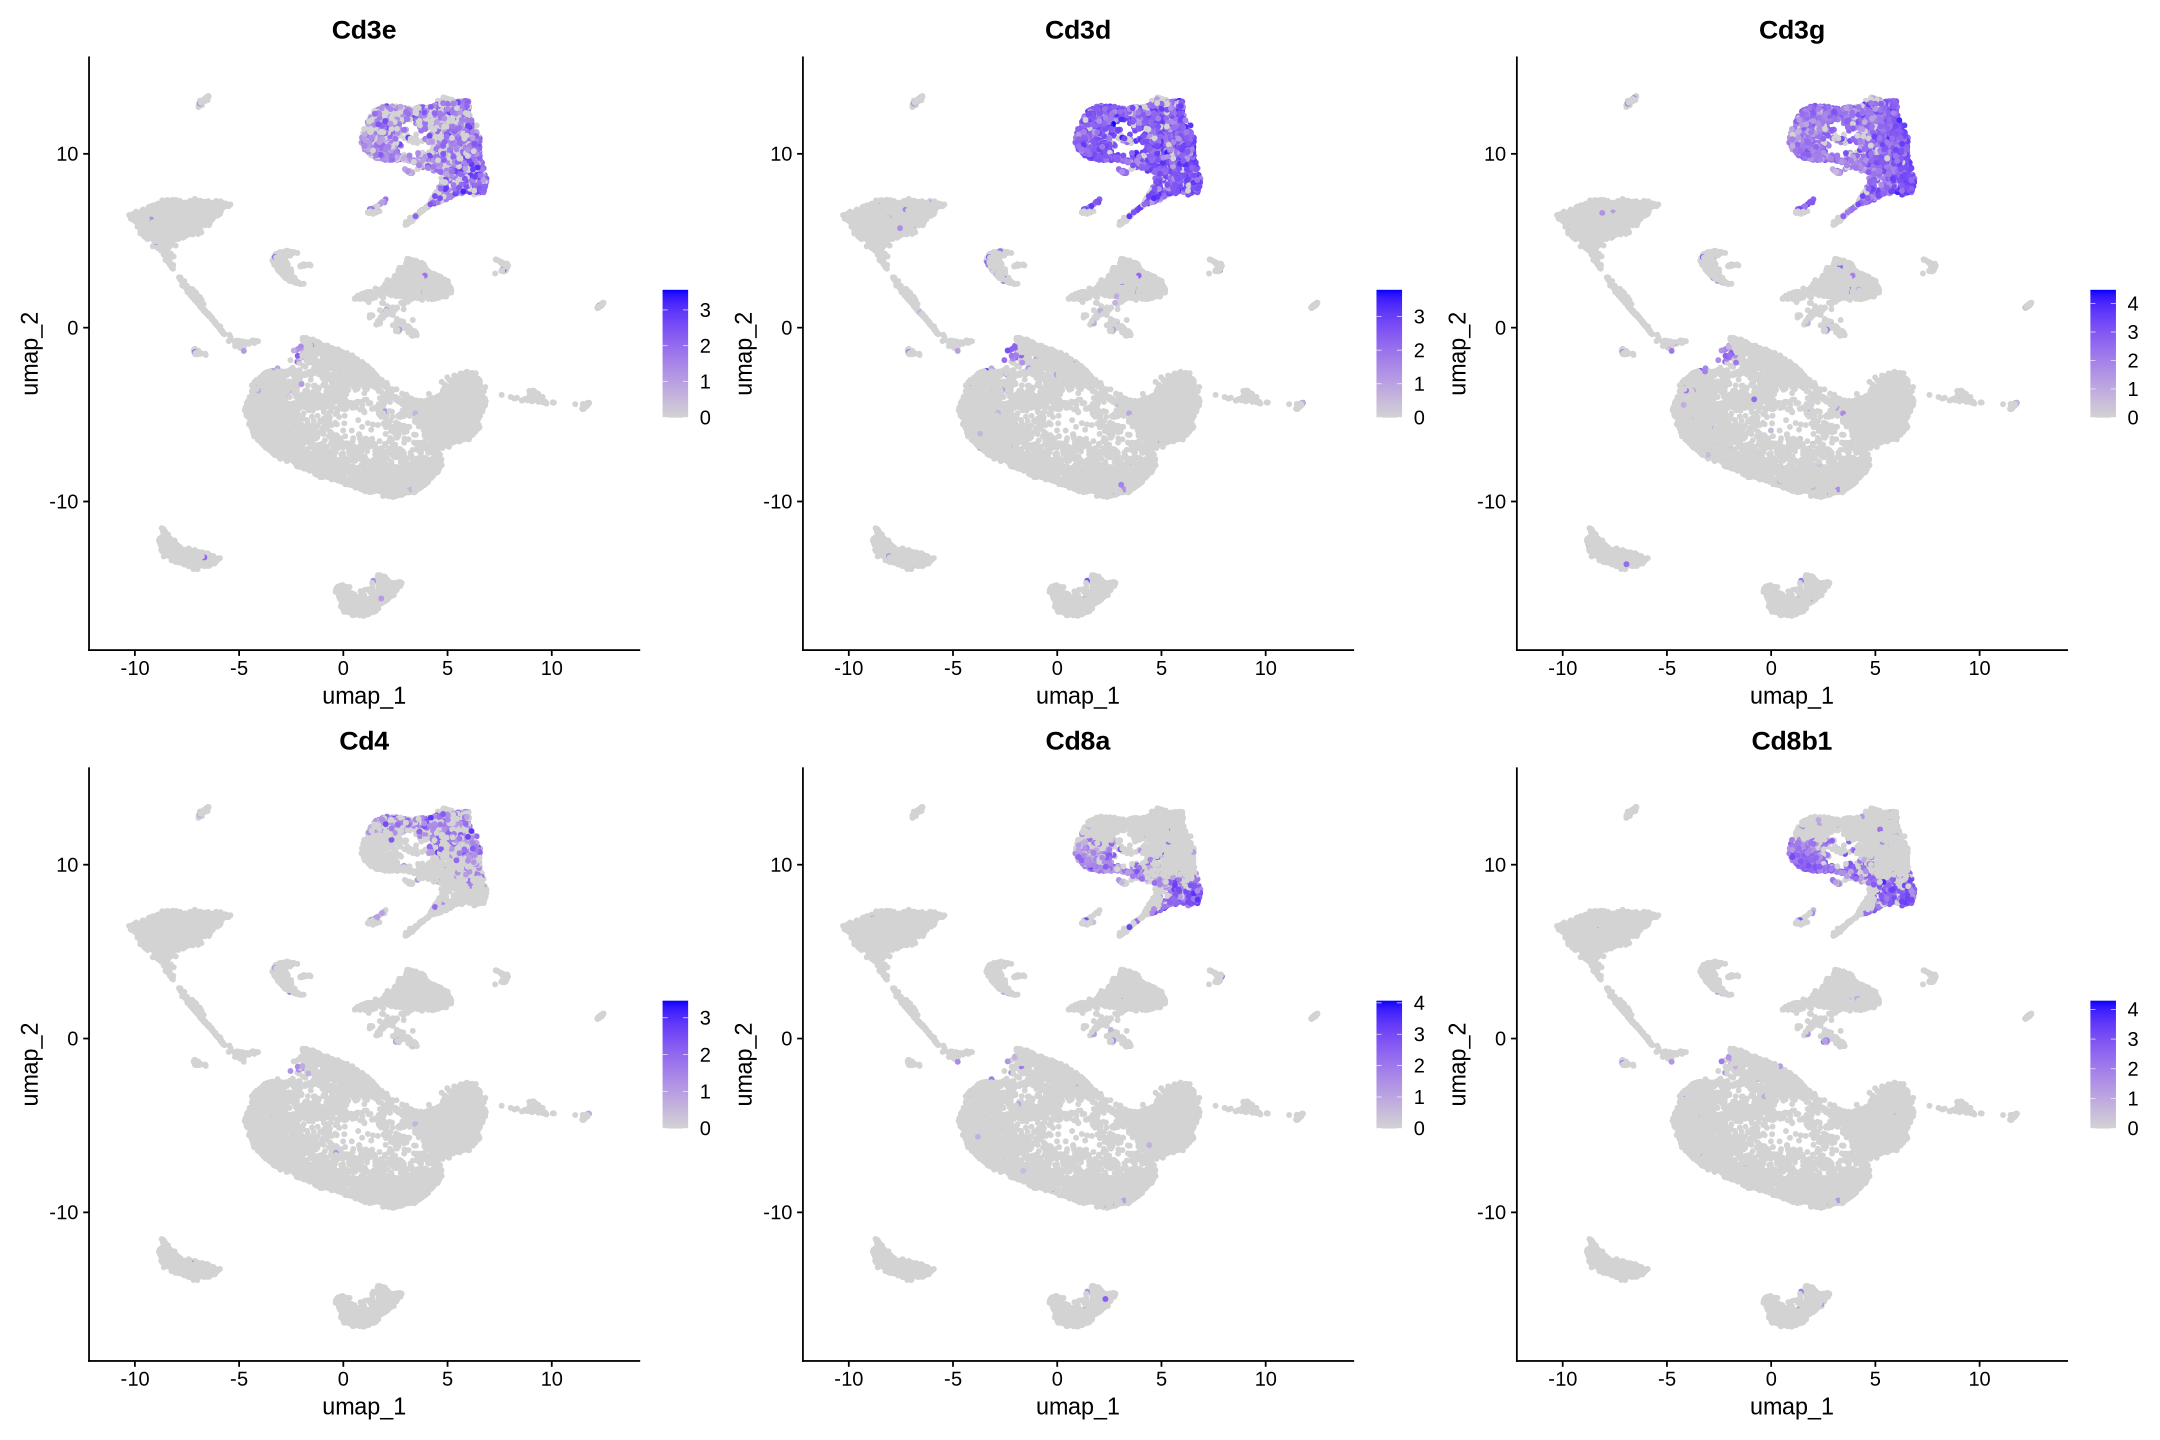

In [8]:
tbl_marker <- bind_rows(
  tibble(
    'cell_type' = 'B lymph',
    'gene' = str_split('Cd19,Cd79a,Cd79b', ',')[[1]]
  ),tibble(
    'cell_type' = 'T lymph',
    'gene' = str_split('Cd3e,Cd3d,Cd3g,Cd4,Cd8a,Cd8b1', ',')[[1]]
  ),tibble(
    'cell_type' = 'Fib',
    'gene' = str_split('Ear2,Clec4a3,Gngt2', ',')[[1]]
  ),tibble(
    'cell_type' = 'Neutro',
    'gene' = str_split('Retnlg,Wfdc21,Lcn2,Slfn4,Lrg1,Csf3r', ',')[[1]]
  ),tibble(
    'cell_type' = 'plasma cell',
    'gene' = str_split('Jchain,Irf4,Xbp1', ',')[[1]]
  ))
genes <- filter(tbl_marker, cell_type == 'T lymph')$gene
options(repr.plot.width = 3 * 6, repr.plot.height                                                                                                                                    =
  6 * ifelse(length(genes) %% 3 == 0, floor(length(genes) %/% 3), floor(length(genes) %/% 3) + 1))
p = FeaturePlot(adata, features = genes, ncol = 3,pt.size = 1)
p
savefig(p,sprintf('%s_markers.png',item), p_plot_item,
  width_ratio = 3 * 6, height_ratio = 2 * 6)
tbl_marker %>% write_csv(file.path(p_root_item,'markers_plot.csv'))
cat(sprintf('[out] %s\n',file.path(p_root_item,'markers_plot.csv')))

# 提取UMAP坐标后，保存metadata

仅保存`cell_name,seurat_clusters,cell_type,UMAP1,UMAP2`

存为`obs_Seurat.csv`

In [9]:
df_umap = adata@reductions$umap@cell.embeddings %>% as.data.frame
df_umap = df_umap %>% mutate(
    cell_name = rownames(df_umap),.before=1
) %>% rename(UMAP1=umap_1,UMAP2=umap_2)
df_umap %>% head(2)
# ## 防止重新运行时文件被覆盖
# adata@meta.data %>% select(cell_name,seurat_clusters,cell_type) %>% left_join(
#     df_umap,by= c('cell_name' = 'cell_name')
# )  %>% write_csv(file.path(p_root_item,'obs_Seurat.csv'))
# cat(sprintf('[out] %s\n',file.path(p_root_item,'obs_Seurat.csv')))

,cell_name,UMAP1,UMAP2
,<chr>,<dbl>,<dbl>
AAACCCAGTAGACAGC-1;B42,AAACCCAGTAGACAGC-1;B42,3.428371,-9.391080
AAACCCATCAGATTGC-1;B42,AAACCCATCAGATTGC-1;B42,1.140191,-3.527618


In [10]:
cat('----------------------------------------
[finish]
----------------------------------------
')

----------------------------------------
[finish]
----------------------------------------
